# Ellipsoid fitting

This function re-implements the [respective function](https://vedo.embl.es/autodocs/content/vedo/pointcloud.html#vedo.pointcloud.pcaEllipsoid) from the vedo library. It applies a [PCA-algorithm](https://en.wikipedia.org/wiki/Principal_component_analysis) to a pointcloud to retrieve the major and minor axises of an ellipsoid, that comprises a set fraction of points within its volumne.

In [1]:
import napari_stress
import napari
import numpy as np

Let's first create some sample data:

In [2]:
pointcloud = np.random.normal(size=(1000, 3)) * 10 * np.array([1,2,3])[None, :]

In [4]:
viewer = napari.Viewer(ndisplay=3)
viewer.add_points(pointcloud, size=0.5, face_color='orange')

22-Jun-22 13:49:36 - vispy    - WARNING  - QWindowsWindow::setGeometry: Unable to set geometry 2180x1370+3840+46 (frame: 2202x1426+3829+1) on QWidgetWindow/"_QtMainWindowClassWindow" on "\\.\DISPLAY1". Resulting geometry: 1633x1025+3838+33 (frame: 1655x1081+3827-12) margins: 11, 45, 11, 11 minimum size: 608x557 MINMAXINFO maxSize=0,0 maxpos=0,0 mintrack=1238,1170 maxtrack=0,0)


<Points layer 'pointcloud' at 0x2569a14e910>

Now, let's retrieve points on a surface that describe an ellipsoid which approximates this data. The `pvalue` parameter controls how many points of the pointcloud will be located within the volume of the determined ellipsoid.

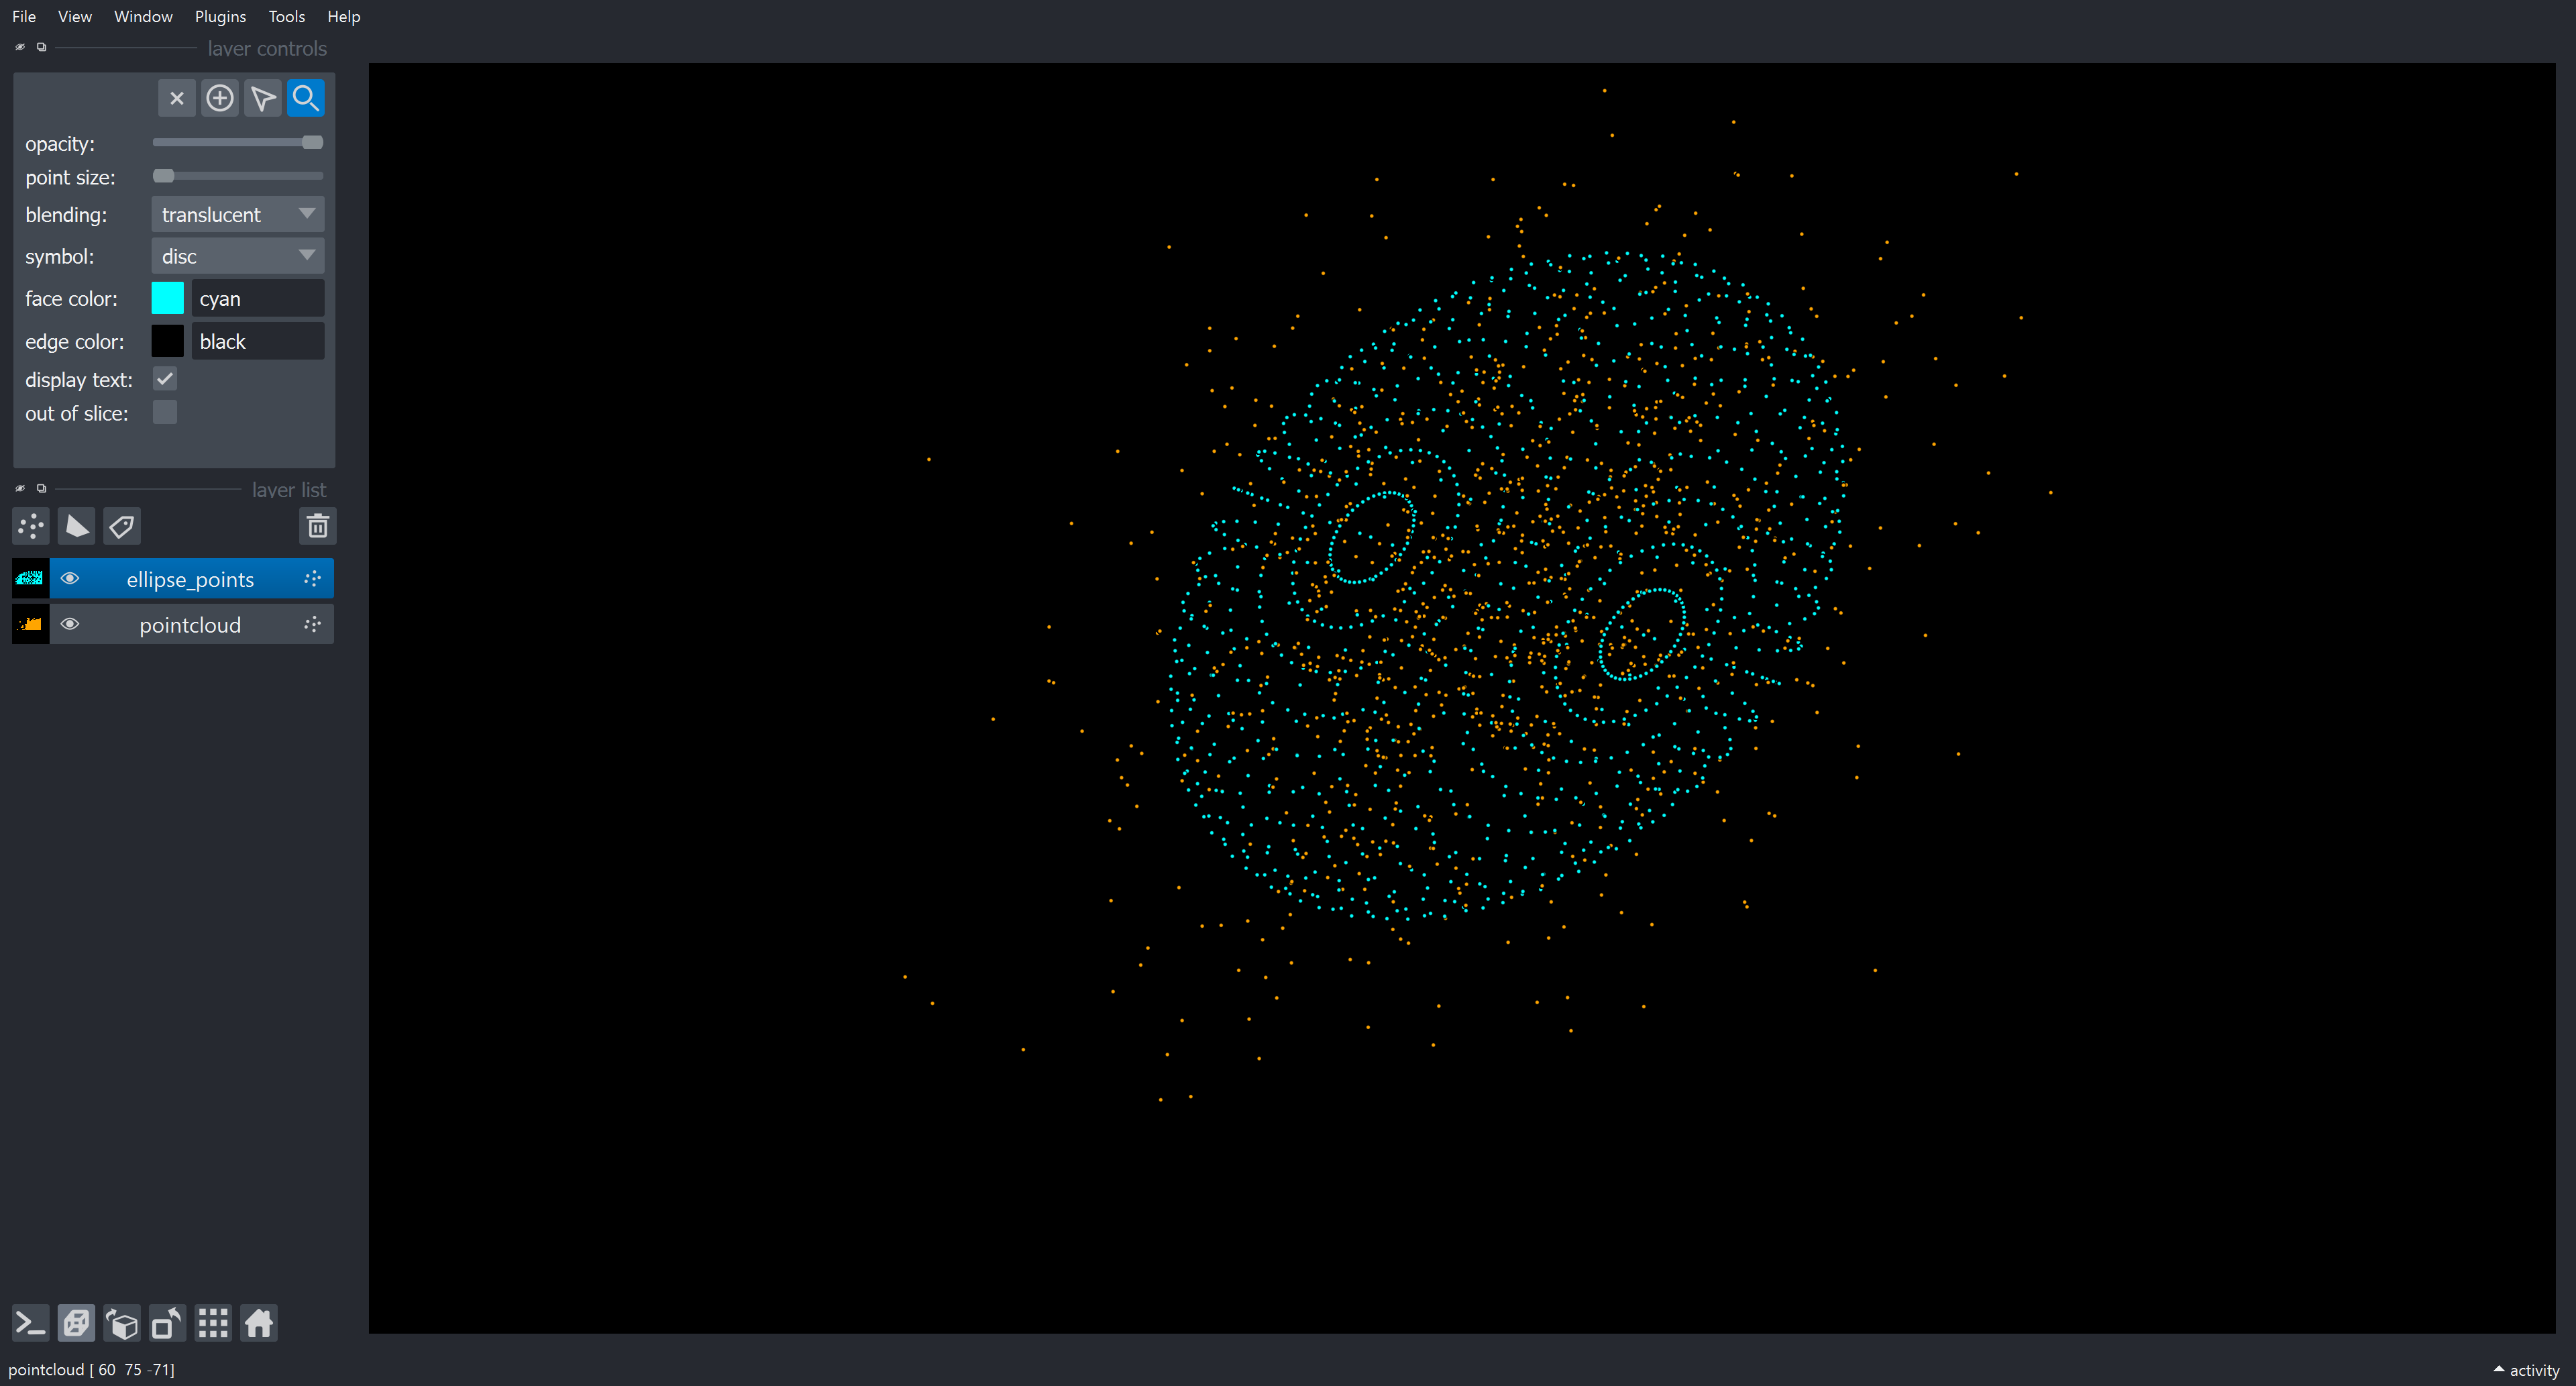

In [6]:
ellipse_points = napari_stress.fit_ellipsoid_to_pointcloud_points(pointcloud, pvalue=0.675)
viewer.add_points(ellipse_points, size=0.5, face_color='cyan')
napari.utils.nbscreenshot(viewer)

We can also use a very similar function to retrieve the manjor minor axis:

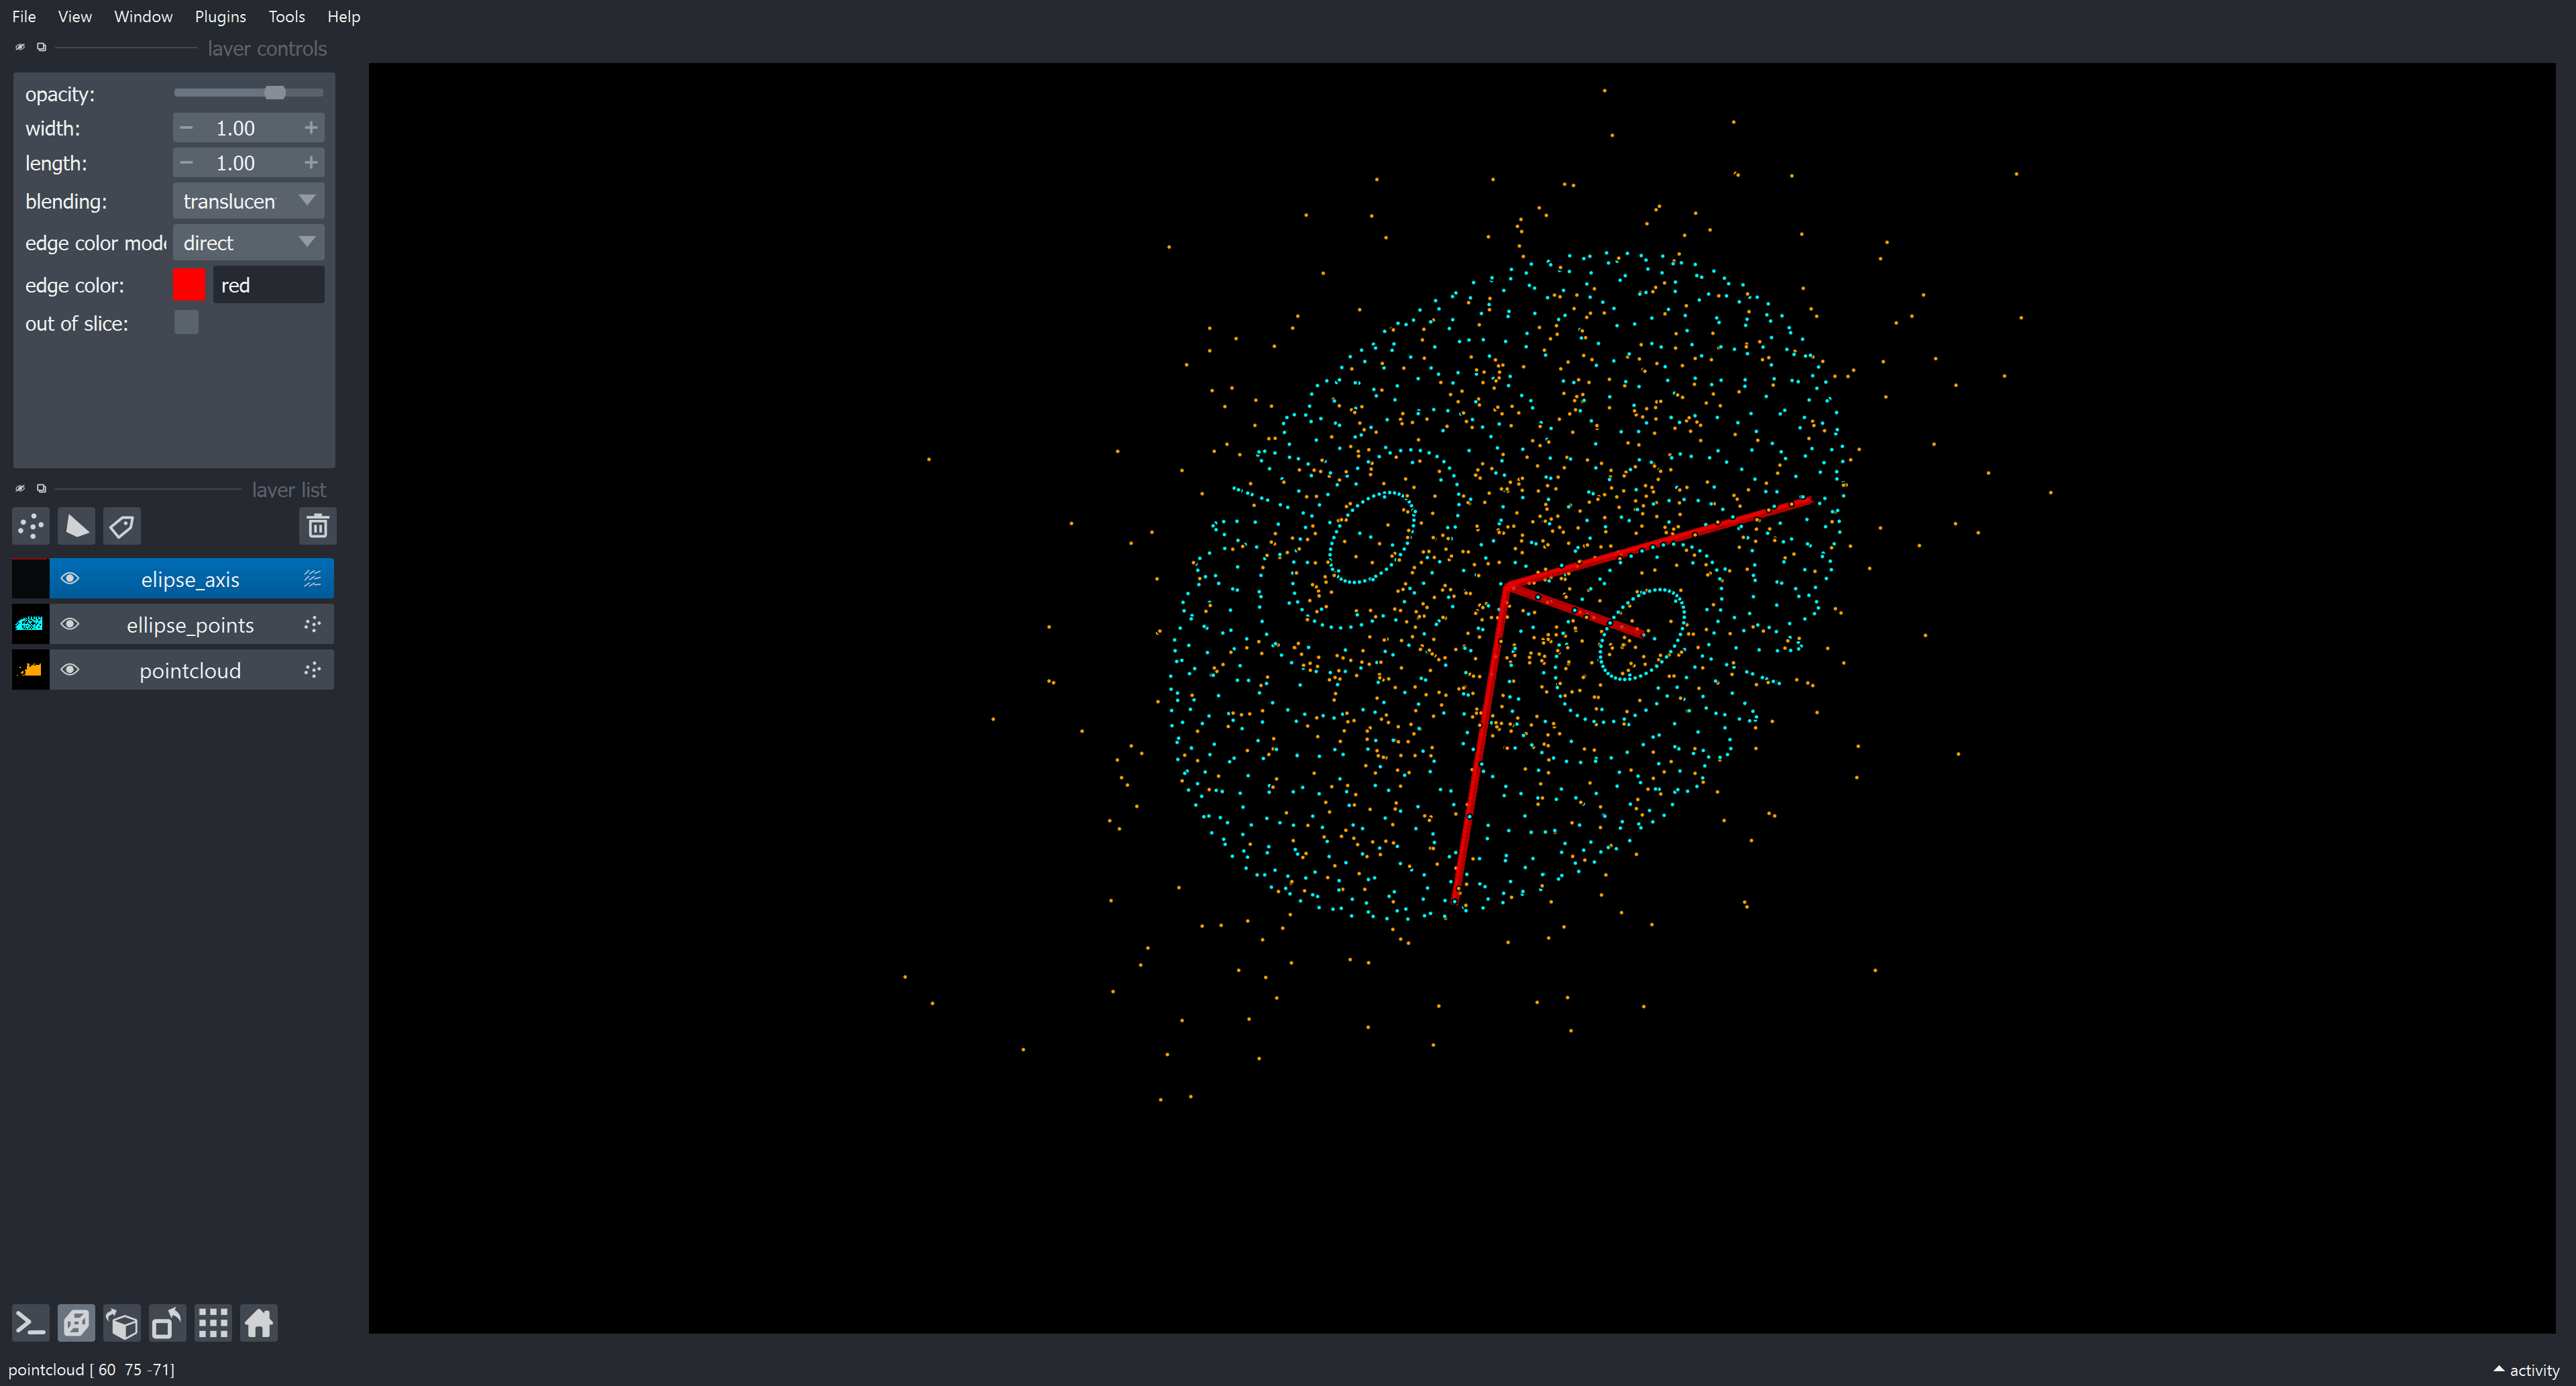

In [8]:
ellipse_axis = napari_stress.fit_ellipsoid_to_pointcloud_vectors(pointcloud)
viewer.add_vectors(ellipse_axis)
napari.utils.nbscreenshot(viewer)